In [4]:
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1, l2

def objective(num_layers, neurons, activation_index, reg_index, learning_rate, epochs, optimizer_index):
    
    # Map indices to actual values
    activations = ['relu', 'sigmoid', 'tanh']
    regularization = [None, l1(0.01), l2(0.01)]
    optimizers = ['adam', 'sgd']
    
    activation = activations[int(activation_index)]
    reg = regularization[int(reg_index)]
    optimizer = optimizers[int(optimizer_index)]
    
    input_vec = Input(shape=(50, 35))
    x = Flatten()(input_vec)
    
    for _ in range(int(num_layers)):
        x = Dense(int(neurons), activation=activation, kernel_regularizer=reg)(x)
        if reg_index == 0:
            pass  # No regularization
        elif reg_index == 1:
            x = Dropout(0.5)(x)  # Dropout regularization
    
    encoded = Dense(6*6*2, activation=activation)(x)
    
    # Decoder (Mirroring the encoder structure)
    x = encoded
    for _ in range(int(num_layers)):
        x = Dense(int(neurons), activation=activation, kernel_regularizer=reg)(x)
        if reg_index == 0:
            pass  # No regularization
        elif reg_index == 1:
            x = Dropout(0.5)(x)  # Dropout regularization

    x = Dense(50*35, activation='sigmoid')(x)
    decoded = Reshape((50, 35))(x)
    
    autoencoder = Model(input_vec, decoded)
    autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
    
    history = autoencoder.fit(data, data, epochs=int(epochs), batch_size=64, validation_split=0.1, verbose=0)
    
    # Return negative validation loss for maximization
    return -history.history['val_loss'][-1]


In [5]:
pbounds = {
    'num_layers': (15, 40),  # example range, you can adjust based on your needs
    'neurons': (64, 512),
    'activation_index': (0, 2),
    'reg_index': (0, 2),
    'learning_rate': (1e-6, 1e-1),
    'epochs': (500, 1200),
    'optimizer_index': (0, 1)
}

optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=1,
)


In [6]:
import pickle
with open(r'D:\Studies\PHD\Research\Study\Study 4.1\Project\DataProcessing\CanonicalSmiles1.pickle', 'rb') as f:
       X, SMILES, Y = pickle.load(f)
        
data = X

In [7]:
import numpy as np
import random
selected_indices = random.sample(range(X.shape[0]), 5000)
selected_X = X[selected_indices]
selected_X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [8]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2
import numpy as np
from tqdm import tqdm
import pandas as pd
# Create dummy binary data
#data = np.random.randint(2, size=(1000, 50, 35))
data = selected_X

optimizer.maximize(
    init_points=15,
    n_iter=30,
)      

with open("results.txt", "w") as file:
    for result in optimizer.res:
        file.write(str(result) + "\n")

# Convert the results list of dictionaries to a DataFrame
df = pd.DataFrame(optimizer.res)

# Save the DataFrame to a CSV file
df.to_csv("results.csv", index=False)


|   iter    |  target   | activa... |  epochs   | learni... |  neurons  | num_la... | optimi... | reg_index |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.05988  | 0.834     | 1.004e+03 | 1.244e-05 | 199.4     | 18.67     | 0.09234   | 0.3725    |
| 2         | -5.535    | 0.6911    | 777.7     | 0.05388   | 251.8     | 32.13     | 0.2045    | 1.756     |
| 3         | -4.978    | 0.05478   | 969.3     | 0.04173   | 314.3     | 18.51     | 0.1981    | 1.601     |
| 4         | -0.06857  | 1.937     | 719.4     | 0.06923   | 456.6     | 37.37     | 0.08504   | 0.07811   |
| 5         | -6.559    | 0.3397    | 1.115e+03 | 0.009836  | 252.7     | 38.95     | 0.5332    | 1.384     |
| 6         | -0.6512   | 0.631     | 980.6     | 0.08346   | 72.19     | 33.75     | 0.9889    | 1.496     |
| 7         | -0.06853  | 0.5609    | 1.052e+03 | 0.01032   | 264.7     | 37.71     | 0.2936    | 0.5756    |
| 8       

| 45        | -0.06854  | 0.7915    | 667.8     | 0.09234   | 103.6     | 33.98     | 0.5185    | 0.8307    |


In [9]:
print(optimizer.max)
with open("best_result.txt", "w") as file:
    for key, value in optimizer.max.items():
        file.write(f"{key}: {value}\n")

{'target': -0.059876345098018646, 'params': {'activation_index': 0.834044009405148, 'epochs': 1004.2271454095107, 'learning_rate': 1.243736735967132e-05, 'neurons': 199.44499253906423, 'num_layers': 18.668897270427827, 'optimizer_index': 0.0923385947687978, 'reg_index': 0.3725204227553418}}


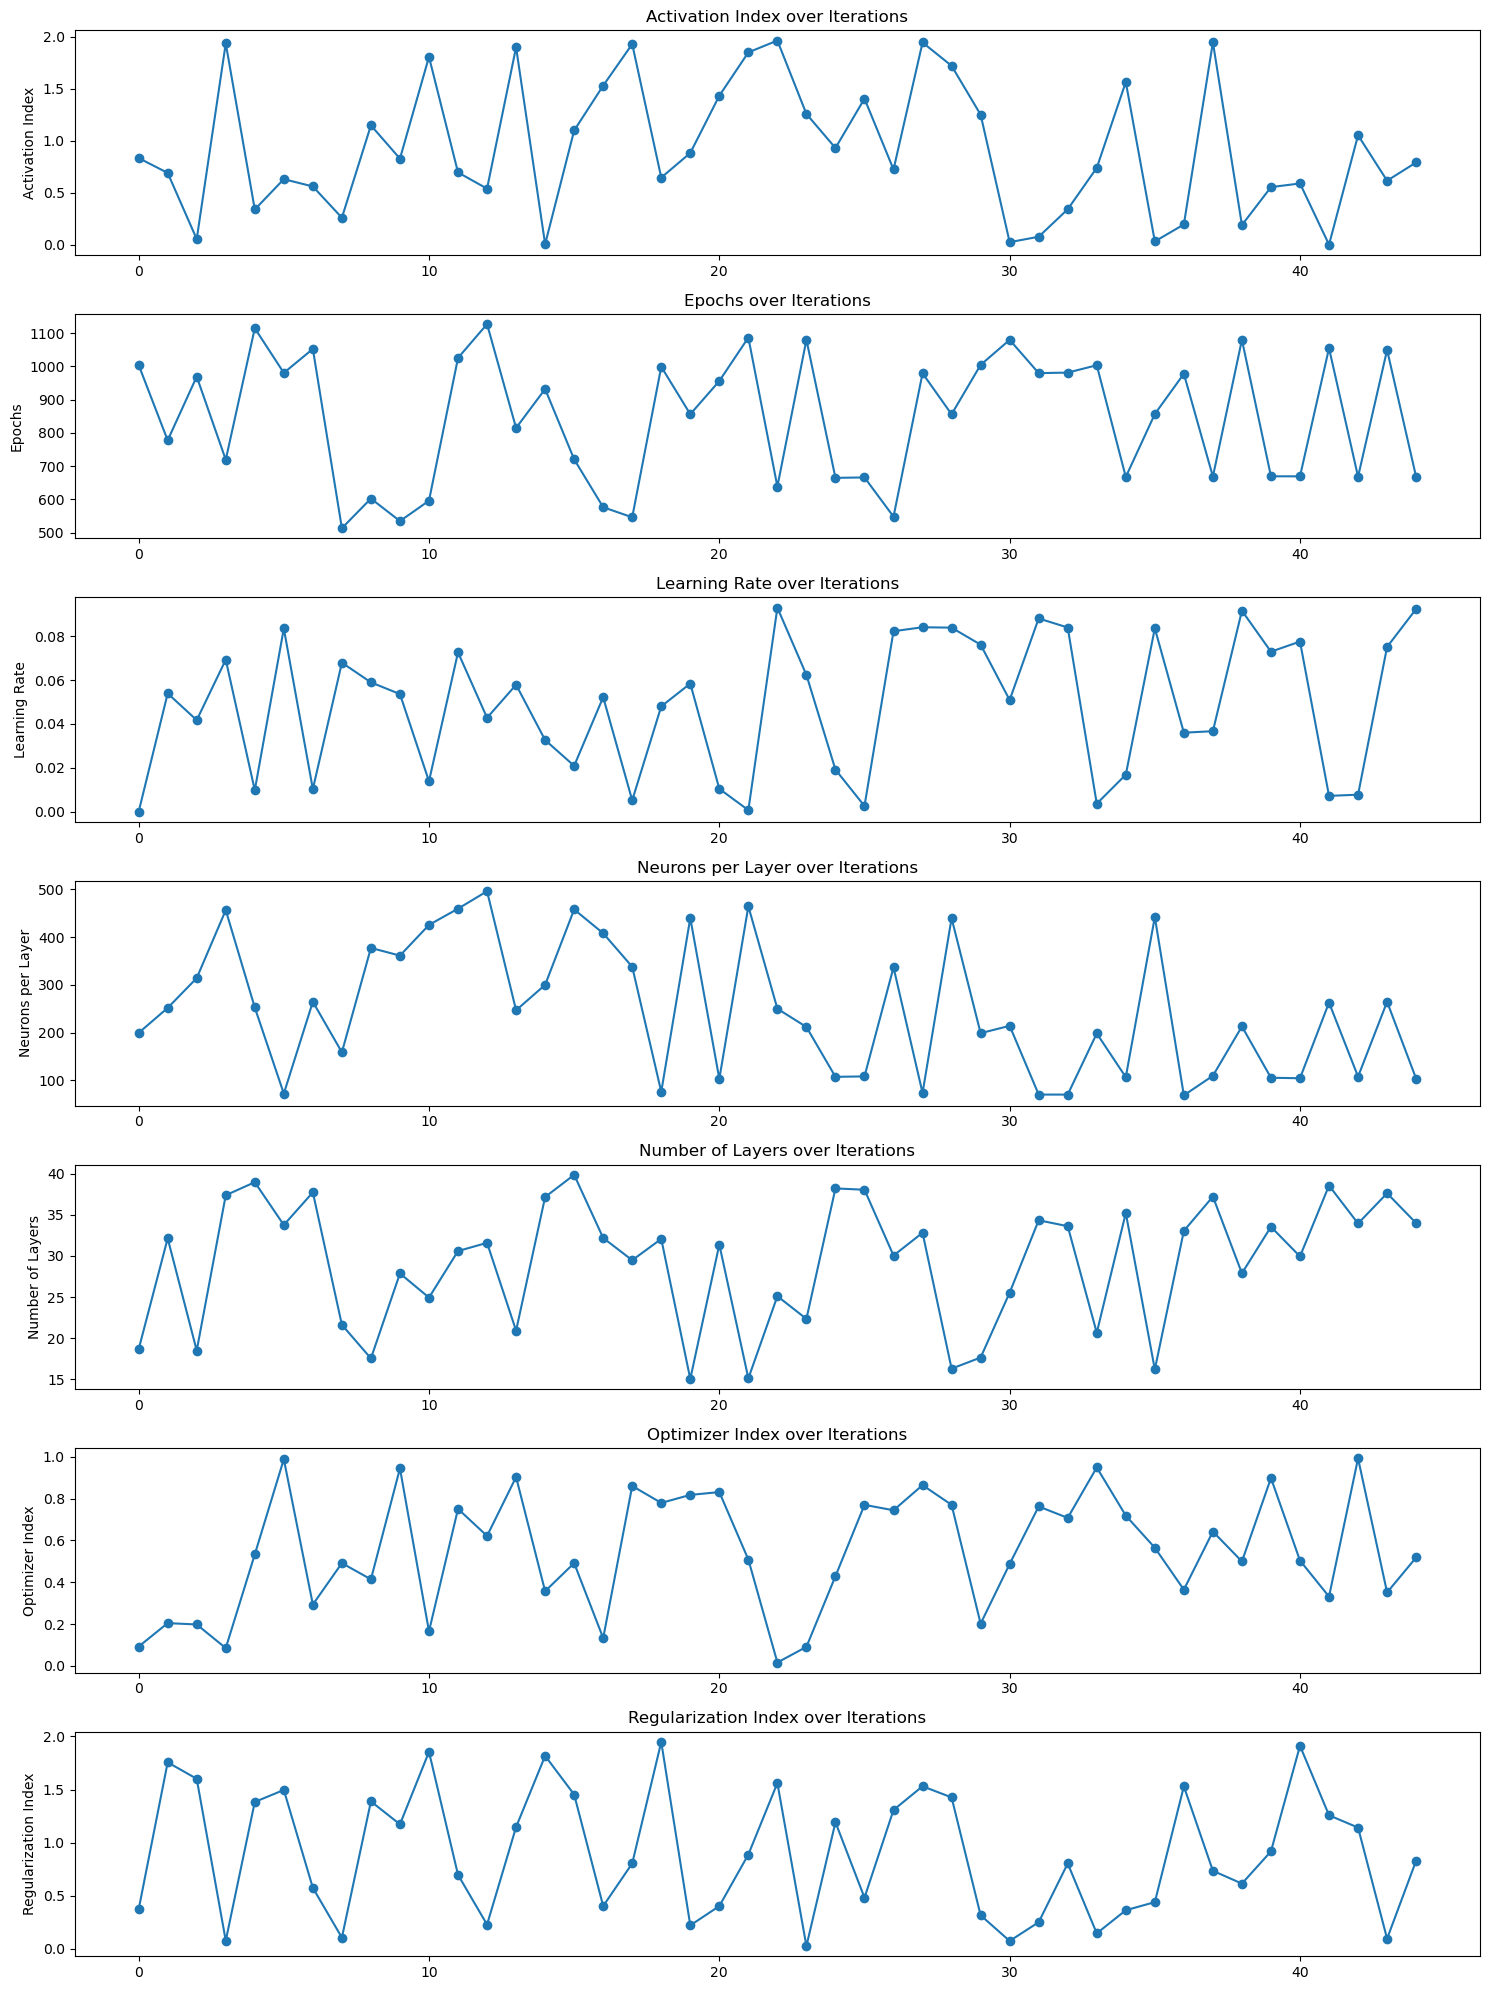

In [10]:
import matplotlib.pyplot as plt

# Extract values from the optimization results
activation_indices = [x['params']['activation_index'] for x in optimizer.res]
epochs_values = [x['params']['epochs'] for x in optimizer.res]
learning_rates = [x['params']['learning_rate'] for x in optimizer.res]
neurons_values = [x['params']['neurons'] for x in optimizer.res]
num_layers_values = [x['params']['num_layers'] for x in optimizer.res]
optimizer_indices = [x['params']['optimizer_index'] for x in optimizer.res]
reg_indices = [x['params']['reg_index'] for x in optimizer.res]
target_values = [x['target'] for x in optimizer.res]

# Plot hyperparameters
fig, axs = plt.subplots(7, 1, figsize=(15, 20))

axs[0].plot(activation_indices, '-o')
axs[0].set_title('Activation Index over Iterations')
axs[0].set_ylabel('Activation Index')

axs[1].plot(epochs_values, '-o')
axs[1].set_title('Epochs over Iterations')
axs[1].set_ylabel('Epochs')

axs[2].plot(learning_rates, '-o')
axs[2].set_title('Learning Rate over Iterations')
axs[2].set_ylabel('Learning Rate')

axs[3].plot(neurons_values, '-o')
axs[3].set_title('Neurons per Layer over Iterations')
axs[3].set_ylabel('Neurons per Layer')

axs[4].plot(num_layers_values, '-o')
axs[4].set_title('Number of Layers over Iterations')
axs[4].set_ylabel('Number of Layers')

axs[5].plot(optimizer_indices, '-o')
axs[5].set_title('Optimizer Index over Iterations')
axs[5].set_ylabel('Optimizer Index')

axs[6].plot(reg_indices, '-o')
axs[6].set_title('Regularization Index over Iterations')
axs[6].set_ylabel('Regularization Index')

plt.tight_layout()

# Save the plot as a PNG
plt.savefig('hyperparameters_plot.png', dpi=300, bbox_inches='tight')

plt.show()


In [3]:
# {'target': -0.6937342286109924, 'params': {'activation_index': 2.0, 'epochs': 500.0, 'learning_rate': 1e-06, 
#                                            'neurons': 393.9534025942016, 'num_layers': 1.0, 'optimizer_index': 0.0,
#                                            'reg_index': 2.0}}

# {'target': -0.6937878131866455, 'params': {'activation_index': 1.5303725262384222, 'epochs': 554.7587623519765, 
#                                            'learning_rate': 0.05219851882346603, 'neurons': 408.17162203905775, 
#                                            'num_layers': 20.927036024553406, 'optimizer_index': 0.13298154074487634, 
#                                            'reg_index': 0.40384924203586325}}

# {'target': -0.06987646967172623, 'params': {'activation_index': 1.4051557022918577, 'epochs': 618.7202258885221, 
#                                             'learning_rate': 0.0026442544585613898, 'neurons': 108.25560715344866, 
#                                             'num_layers': 27.715492223331783, 'optimizer_index': 0.7703341947670929, 
#                                             'reg_index': 0.4830045265645564}}

# {'target': -0.06389316916465759, 'params': {'activation_index': 1.8501976935442401, 'epochs': 919.0962665675806,
#                                             'learning_rate': 0.0007594691827881292, 'neurons': 464.6111106194393, 
#                                             'num_layers': 1.155621851574995, 'optimizer_index': 0.5087434877670002, 
#                                             'reg_index': 0.8889961232166153}}


import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2

# Hyperparameters from Bayesian Optimization
activation_function = 'tanh'
epochs = 920
learning_rate = 0.00075
neurons_per_layer = 465
num_layers = 2
optimizer = 'adam'
regularization = l2(0.8)

# Autoencoder architecture
input_vec = Input(shape=(50, 35))
x = Flatten()(input_vec)

# Encoding layers
for _ in range(num_layers):
    x = Dense(neurons_per_layer, activation=activation_function, kernel_regularizer=regularization)(x)

# Latent representation
latent_dim = 6 * 6 * 2
x = Dense(latent_dim, activation=activation_function)(x)

# Decoding layers
for _ in range(num_layers):
    x = Dense(neurons_per_layer, activation=activation_function, kernel_regularizer=regularization)(x)

# Final decoding to original dimensions
decoded = Dense(50*35, activation='sigmoid')(x)
decoded = Reshape((50, 35))(decoded)

# Model compilation
autoencoder = Model(input_vec, decoded)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Model summary to check the architecture
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 35)]          0         
                                                                 
 flatten (Flatten)           (None, 1750)              0         
                                                                 
 dense (Dense)               (None, 465)               814215    
                                                                 
 dense_1 (Dense)             (None, 465)               216690    
                                                                 
 dense_2 (Dense)             (None, 72)                33552     
                                                                 
 dense_3 (Dense)             (None, 465)               33945     
                                                                 
 dense_4 (Dense)             (None, 465)               216690

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Create a synthetic binary dataset
#data = np.random.randint(2, size=(1000, 50, 35))

# Hyperparameters from Bayesian Optimization
# activation_function = 'tanh'
# epochs = 500
# learning_rate = 1e-06
# neurons_per_layer = 394
# num_layers = 1
# optimizer = 'adam'
# regularization = l2(0.01)

# Autoencoder architecture
input_vec = Input(shape=(50, 35))
x = Flatten()(input_vec)

# Encoding layers
for _ in range(num_layers):
    x = Dense(neurons_per_layer, activation=activation_function, kernel_regularizer=regularization)(x)

# Latent representation
latent_dim = 6 * 6 * 2
x = Dense(latent_dim, activation=activation_function)(x)

# Decoding layers
for _ in range(num_layers):
    x = Dense(neurons_per_layer, activation=activation_function, kernel_regularizer=regularization)(x)

# Final decoding to original dimensions
decoded = Dense(50*35, activation='sigmoid')(x)
decoded = Reshape((50, 35))(decoded)

# Model compilation
autoencoder = Model(input_vec, decoded)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data, epochs=epochs, batch_size=64, validation_split=0.1, verbose=1)

# Predict outputs on the dataset
decoded_data = autoencoder.predict(data)

# To get binary values (0 or 1), you can threshold the predictions
threshold = 0.5
binary_decoded_data = (decoded_data > threshold).astype(int)

# Print the first original and decoded sample to see the results
print("Original Data:\n", data[0])
print("\nDecoded Data:\n", binary_decoded_data[0])


In [ ]:
# Calculate the accuracy
matching_elements = np.sum(data == binary_decoded_data)
total_elements = data.size
accuracy_percentage = (matching_elements / total_elements) * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")
